In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/shantanudhakadd/diabetes-dataset-for-beginners")

Skipping, found downloaded files in "./diabetes-dataset-for-beginners" (use force=True to force download)


In [ ]:
#Display the data using pandas
#The dataset contains the following columns:
#Pregnancies - Number of times a woman was pregnant
#Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
#BloodPressure - Diastolic blood pressure (mm Hg)
#SkinThickness - Triceps skin fold thickness (mm)
#Insulin - 2-Hour serum insulin (mu U/ml)
#BMI - Body mass index (weight in kg/(height in m)^2)
#DiabetesPedigreeFunction - Diabetes pedigree function
#Age - Age (years)
#Outcome: Class variable, where 0 = no diabetes, 1 = diabetes
!pip install streamlit pyngrok
import pandas as pd
diabetes_dataset = pd.read_csv("diabetes-dataset-for-beginners/diabetes.csv")
# Adjust display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)
diabetes_dataset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.3 MB/s eta 0:00:00


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
summary_statistics = diabetes_dataset.describe()
summary_statistics

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#Shows us how many people have diabetes and how many do not
class_distribution = diabetes_dataset['Outcome'].value_counts()
print(class_distribution)

Outcome
0    500
1    268
Name: count, dtype: int64


In [ ]:
#Tells us what outcome is most likely to affect diabetes
corr_matrix = diabetes_dataset.corr()
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

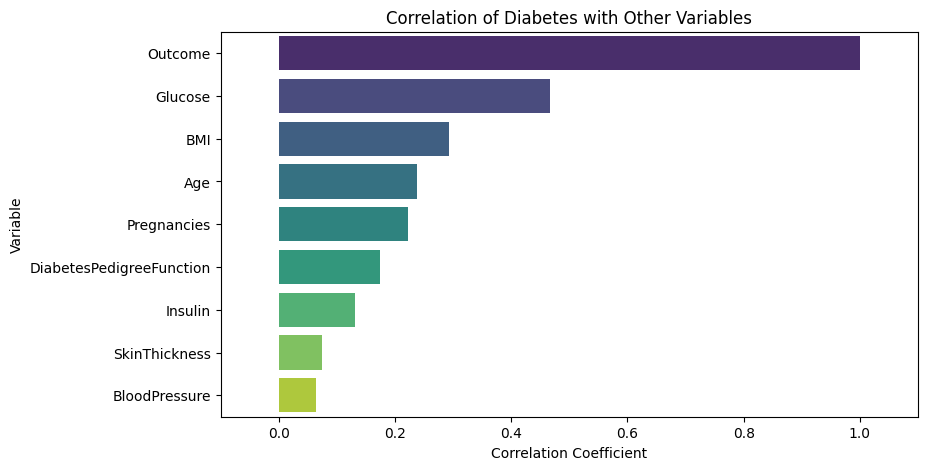

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix
corr_matrix = diabetes_dataset.corr()

# Sort correlations of 'Outcome' variable in descending order
outcome_correlations = corr_matrix['Outcome'].sort_values(ascending=False)

# Plotting
plt.figure(figsize=(9, 5))
sns.barplot(x=outcome_correlations.values, y=outcome_correlations.index, hue=outcome_correlations.index, palette='viridis', dodge=False, legend=False)
plt.title('Correlation of Diabetes with Other Variables')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variable')
plt.xlim(-0.1, 1.1)
plt.show()


In [ ]:
#Gets the values for the correlation matrix
correlation_matrix = diabetes_dataset.corr()
correlation_matrix
#Note - the last row of the heatmap is the same as the data above, however, I thought that it would be easier to visualize exactly what variable influenced diabetes more by using a bar chart


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


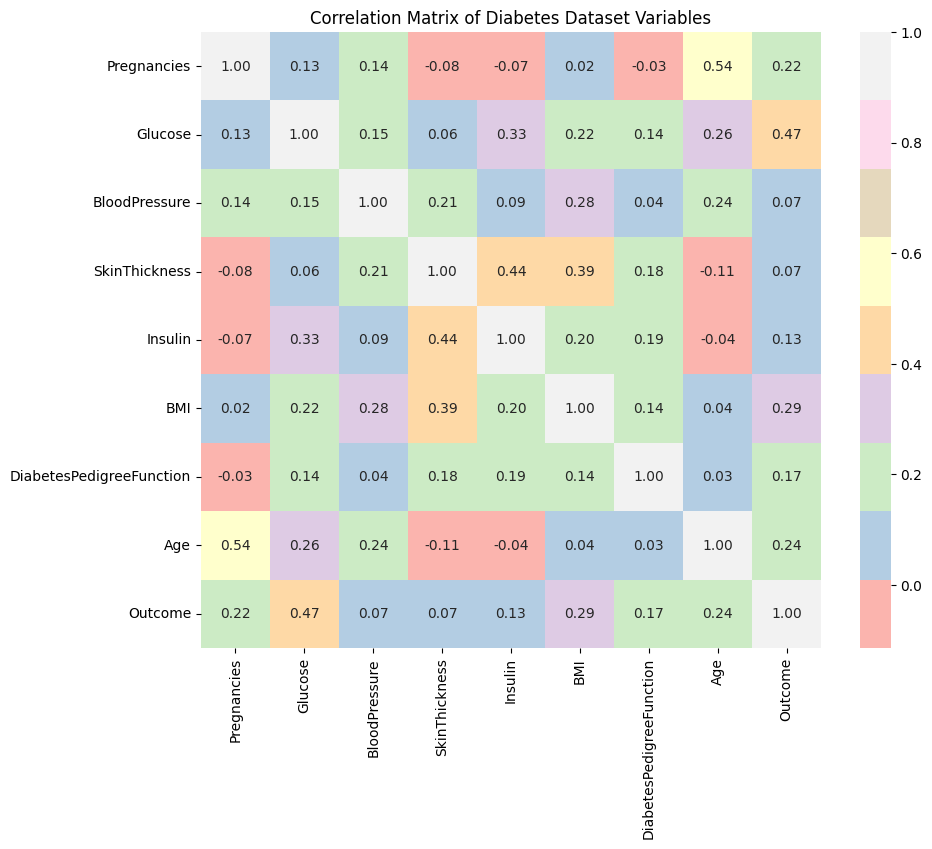

In [ ]:

# Calculate the correlation matrix
correlation_matrix = diabetes_dataset.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1', fmt='.2f')



# Add titles and labels for better understanding
plt.title('Correlation Matrix of Diabetes Dataset Variables')
plt.show()

In [ ]:
#use scikit-learn to model the data - dont use R, since im not sure how R would work w/ this and idk anything about R, but if u can figure out how to make R work w/ this, im fine w/ that

### Creating our model

In [ ]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 18.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import pickle

## Model 1: All predictors are used

In [ ]:
# training dataset
X = diabetes_dataset.drop('Outcome', axis=1)
y = diabetes_dataset['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=21)




In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegression(random_state =0).fit(X_train_scaled, y_train)



In [ ]:
y_pred = model.predict(X_test_scaled)
y_pred


array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Evaluating Model 1

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

[[131  13]
 [ 48  39]]
              precision    recall  f1-score   support

           0       0.73      0.91      0.81       144
           1       0.75      0.45      0.56        87

    accuracy                           0.74       231
   macro avg       0.74      0.68      0.69       231
weighted avg       0.74      0.74      0.72       231

Accuracy: 0.7359307359307359


In [ ]:
#coefficient
coefficients = model.coef_[0]
coeff_df = pd.DataFrame(coefficients, X.columns, columns=['Coefficient'])
print(coeff_df)

                          Coefficient
Pregnancies                  0.388109
Glucose                      1.223787
BloodPressure               -0.354250
SkinThickness                0.015176
Insulin                     -0.201321
BMI                          0.831464
DiabetesPedigreeFunction     0.295005
Age                          0.225561


In [ ]:
#Odds Ratio
odds_ratios = np.exp(coefficients)
odds_ratios_df = pd.DataFrame(odds_ratios, X.columns, columns=['Odds Ratio'])
print(odds_ratios_df)

hypo_predictors = ['Pregnancies','Glucose','BMI','DiabetesPedigreeFunction', 'Age', 'SkinThickness']



                          Odds Ratio
Pregnancies                 1.474190
Glucose                     3.400038
BloodPressure               0.701700
SkinThickness               1.015292
Insulin                     0.817650
BMI                         2.296679
DiabetesPedigreeFunction    1.343133
Age                         1.253025


# Model 2: plasma glucose concentration, BMI, and diabetes pedigree function

In [ ]:
hypo_predictors = ['Glucose', 'BMI', 'DiabetesPedigreeFunction']
X2 = diabetes_dataset[hypo_predictors]
y2 = diabetes_dataset['Outcome']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state=21)



In [ ]:
scaler2 = StandardScaler()
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)

In [ ]:
model2 = LogisticRegression(random_state =0).fit(X2_train_scaled, y2_train)
with open('diabetes_model2.pkl', 'wb') as file:
    pickle.dump(model2, file)


In [ ]:
y2_pred = model2.predict(X2_test_scaled)
y2_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Evaluating Model 2

In [ ]:
print(confusion_matrix(y2_test, y2_pred))
print(classification_report(y2_test, y2_pred))
print('Accuracy:', accuracy_score(y2_test, y2_pred))

[[133  11]
 [ 50  37]]
              precision    recall  f1-score   support

           0       0.73      0.92      0.81       144
           1       0.77      0.43      0.55        87

    accuracy                           0.74       231
   macro avg       0.75      0.67      0.68       231
weighted avg       0.74      0.74      0.71       231

Accuracy: 0.7359307359307359


In [ ]:
#coefficient
coefficients2 = model2.coef_[0]
coeff_df2 = pd.DataFrame(coefficients2, X2.columns, columns=['Coefficient'])
print(coeff_df2)

                          Coefficient
Glucose                      1.178562
BMI                          0.672311
DiabetesPedigreeFunction     0.210604


In [ ]:
#Odds Ratio
odds_ratios2 = np.exp(coefficients2)
odds_ratios_df2 = pd.DataFrame(odds_ratios2, X2.columns, columns=['Odds Ratio'])
print(odds_ratios_df2)

                          Odds Ratio
Glucose                     3.249696
BMI                         1.958759
DiabetesPedigreeFunction    1.234423


# Model 3: Pregnancies, Glucose, BMI, DiabetesPedigreeFunction, Age, SkinThickness

In [ ]:
# Define predictors and target variable
hypo_predictors3 = ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'SkinThickness']
X3 = diabetes_dataset[hypo_predictors3]
y3 = diabetes_dataset['Outcome']

# Split the data
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=21)

# Scale the data
scaler3 = StandardScaler()
X3_train_scaled = scaler3.fit_transform(X3_train)
X3_test_scaled = scaler3.transform(X3_test)

# Train the model
model3 = LogisticRegression(random_state=0).fit(X3_train_scaled, y3_train)

# Save the model and scaler
with open('diabetes_model.pkl', 'wb') as model_file:
    pickle.dump(model3, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler3, scaler_file)

# Predict using the model on the test set
y3_pred = model3.predict(X3_test_scaled)
y3_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Evaluating Model 3

In [ ]:
# Evaluate the model
print("y3_test shape:", y3_test.shape)
print("y3_pred shape:", y3_pred.shape)

print("Accuracy:", accuracy_score(y3_test, y3_pred))
print("Confusion Matrix:\n", confusion_matrix(y3_test, y3_pred))
print("Classification Report:\n", classification_report(y3_test, y3_pred))

y3_test shape: (231,)
y3_pred shape: (231,)
Accuracy: 0.7445887445887446
Confusion Matrix:
 [[133  11]
 [ 48  39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.92      0.82       144
           1       0.78      0.45      0.57        87

    accuracy                           0.74       231
   macro avg       0.76      0.69      0.69       231
weighted avg       0.75      0.74      0.72       231



In [ ]:
#coefficient
coefficients3 = model3.coef_[0]
coeff_df3 = pd.DataFrame(coefficients3, X3.columns, columns=['Coefficient'])
print(coeff_df3)

                          Coefficient
Pregnancies                  0.374552
Glucose                      1.124324
BMI                          0.774550
DiabetesPedigreeFunction     0.278036
Age                          0.161020
SkinThickness               -0.144987


In [ ]:
#Odds Ratio
odds_ratios3 = np.exp(coefficients3)
odds_ratios_df3 = pd.DataFrame(odds_ratios3, X3.columns, columns=['Odds Ratio'])
print(odds_ratios_df3)

                          Odds Ratio
Pregnancies                 1.454340
Glucose                     3.078136
BMI                         2.169615
DiabetesPedigreeFunction    1.320533
Age                         1.174709
SkinThickness               0.865033


### Deploy and Make Model Accesibile

In [ ]:
!pip install streamlit -q
!pip install sklearn



  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:

import streamlit as st
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pickle


In [ ]:
#!streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py

%%writefile app.py
import pickle
import pandas as pd
import streamlit as st

# Load the model and scaler
model = pickle.load(open('diabetes_model.pkl', 'rb'))
scaler = pickle.load(open('scaler.pkl', 'rb'))

def predict_diabetes(predictors):
    predictors = [predictors]
   # st.write(f"Predictors (before scaling): {predictors}")

    predictors_scaled = scaler.transform(predictors)
   # st.write(f"Predictors (scaled): {predictors_scaled}")

    prediction = model.predict(predictors_scaled)
    st.write(f"Prediction: {prediction}")
    return prediction[0]

st.title("Diabetes Prediction Site")

def user_report():
    Glucose = st.number_input('Glucose', 0, 199, 85)
    BMI = st.number_input('BMI', 0.0, 67.1, 22.0)
    DiabetesPedigreeFunction = st.number_input('DiabetesPedigreeFunction', 0.078, 2.42, 0.2)
    Pregnancies = st.number_input('Pregnancies', 0, 20, 0)
    Age = st.number_input('Age', 0, 120, 30)
    SkinThickness = st.number_input('SkinThickness', 0, 99, 20)

    return [Glucose, BMI, DiabetesPedigreeFunction, Pregnancies, Age, SkinThickness]

user_data = user_report()
st.subheader("Diabetes Prediction Factors")
st.write(user_data)

if st.button('Predict'):
    prediction = predict_diabetes(user_data)
    st.write(f"Prediction: {'Diabetes' if prediction == 1 else 'No Diabetes'}")
    st.write(f"Let Glucose = 0, BMI = 1, DiabetesPedigreeFunction = 2, Pregnancies = 3, Age = 4, SkinThickness = 5")





Writing app.py


In [ ]:
!pip install streamlit -q


In [ ]:
!wget -q -O - ipv4.icanhazip.com

35.194.83.247


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.194.83.247:8501

npx: installed 22 in 7.243s
your url is: https://calm-nights-serve.loca.lt
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
